# 21. Co-occurrence of banding with glacial conditions
This notebook plots the depths the green bands occur at as vertical green bars alongside benthic oxygen isotopes to put their formation in a global climate context. The d18o values that bands occur at is histogrammed alongside this plot.

This notebook produces supplementary figure 7.

## Setup
### Import Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from scipy import signal,interpolate,stats,linalg
from IPython.display import clear_output
import time
import numpy as np
import seaborn as sns
%matplotlib inline
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

### Set Paths

In [2]:
data_path='/Users/danielbabin/GitHub/Green_Bands/Data/'
table_path='/Users/danielbabin/GitHub/Green_Bands/Tables/'
core_photos='/Users/danielbabin/GitHub/Green_Bands/CorePhotos/LowRes/'
figure_path='/Users/danielbabin/GitHub/Green_Bands/Figures/Main/'
sup_figure_path='/Users/danielbabin/GitHub/Green_Bands/Figures/Supplementary/'
misc_path='/Users/danielbabin/GitHub/Green_Bands/Data/Misc/'

### Import Data
#### U1474

In [4]:
green_layers=pd.read_csv(table_path+'Supplementary Table 6A - U1474 green bands.csv')
green_true=green_layers.copy()

In [9]:
am=pd.read_csv(table_path+'Supplementary Table 2 - Age-depth model.csv')
am['Top Interval Depth CCSF (m)']=am['Depth CCSF (m)'].shift(1)
am['Top Interval Age (kyr)']=am['Age (kyr)'].shift(1)
fam=interpolate.interp1d(am['Depth CCSF (m)'],am['Age (kyr)'],bounds_error=False)

In [11]:
green_true['Top Age (kyr)']=fam(green_true['Top Depth CCSF (m)'])
green_true['Bottom Age (kyr)']=fam(green_true['Bottom Depth CCSF (m)'])
agt=green_true[~green_true['Bottom Age (kyr)'].isnull()].set_index('Bottom Age (kyr)',drop=False).sort_index()

#### U1313

In [16]:
green_layers_1313=pd.read_csv(table_path+'Supplementary Table 6B - U1313 green bands.csv')

In [18]:
green_layers_1313['Class']=green_layers_1313['Label']-1
green_true_1313=green_layers_1313[green_layers_1313['Class']>0].copy()

In [21]:
am1313=pd.read_csv(misc_path+'1313_age_model_L*.csv')
fam1313=interpolate.interp1d(am1313['Depth (mcd)'],am1313['Age (ka)'],bounds_error=False)

In [22]:
green_true_1313['Top Age (kyr)']=fam1313(green_true_1313['Top Depth CCSF (m)'])
green_true_1313['Bottom Age (kyr)']=fam1313(green_true_1313['Bottom Depth CCSF (m)'])
agt1313=green_true_1313[~green_true_1313['Top Age (kyr)'].isnull()].set_index('Top Age (kyr)').sort_index()

#### Glacials

In [12]:
gs=[[14, 29],[57, 71],[130, 191],[243, 300],[337, 374],[424, 478],[524, 563],[621, 676],
    [712, 761],[790, 814],[866, 900],[917, 936],[959, 970],[982, 1014],[1031, 1062],[1081,1104],
    [1114, 1141],[1190,1215],[1240,1265],[1285,1300],[1320,1344],[1365,1382],[1407,1424],
    [1453,1468],[1494,1510],[1531,1546],[1571,1583],[1642,1669],[1699,1712],[1744,1754],
    [1785,1802],[1860,1871],[1899,1914],[1941,1965],[1996,2016]]

#### Benthic Forams

In [24]:
swchem=pd.read_csv(table_path+'Supplementary Table 1 - Benthic Foram Chemistry.csv')
swchem['Depositional Age (kyr)']=fam(swchem['Top depth CCSF (m)'])
aswchem=swchem.set_index('Depositional Age (kyr)',drop=False)

In [25]:
lr04=pd.read_csv(misc_path+'LR04stack.txt',sep='\t',index_col='Time (ka)')

## Make Figure

In [27]:
f=interpolate.interp1d(lr04.index,lr04['Benthic d18O (per mil)'])

In [28]:
agt['d18O']=f(agt.index)
agt1313['d18O']=f(agt1313.index)

In [29]:
stats_U1474=(agt.loc[:1200,'d18O']>4).value_counts()
stats_U1313=(agt1313.loc[:1200,'d18O']>4).value_counts()

In [30]:
glacial_U1474=np.round(stats_U1474[True]/len(agt.loc[0:1200])*100)
glacial_U1313=np.round(stats_U1313[True]/len(agt1313.loc[0:1200])*100)

In [33]:
thresh_d18o=4

In [35]:
colors=sns.color_palette()

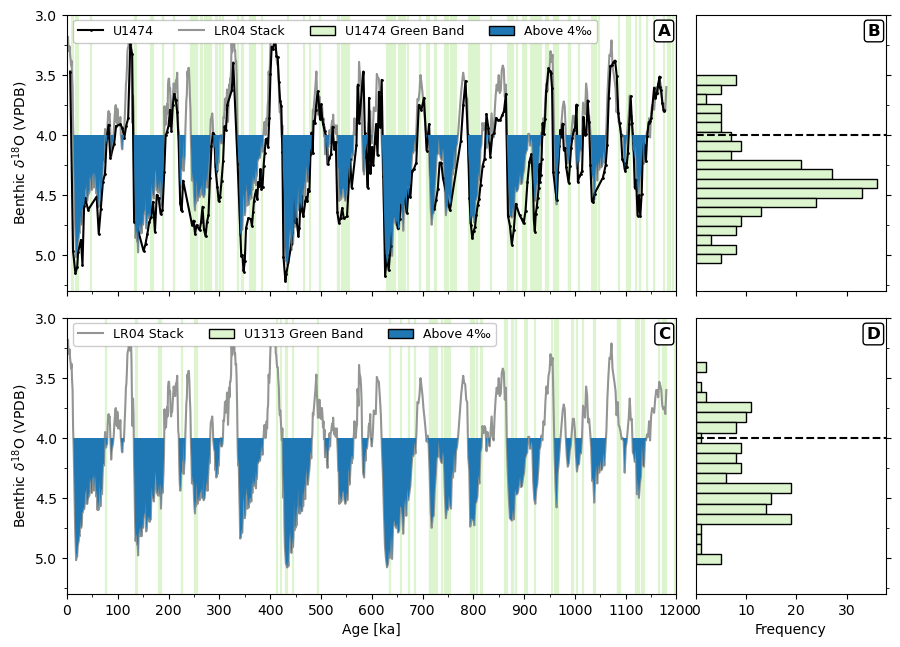

In [40]:
# Create a figure
fig = plt.figure(figsize=(9, 6.5))

# Set up GridSpec layout
gs = gridspec.GridSpec(2, 4, wspace=.1,left=.07,right=.98,top=.97,bottom=.08,hspace=.1)  # 1 row, 3 columns

# Create subplots
ax1 = fig.add_subplot(gs[0, :-1])  # First subplot spans first two columns
ax2 = fig.add_subplot(gs[0, -1])   # Second subplot spans the third column
ax3 = fig.add_subplot(gs[1, :-1],sharex=ax1)  # First subplot spans first two columns
ax4 = fig.add_subplot(gs[1, -1],sharex=ax2)   # Second subplot spans the third column

#########################################################################################################################

ax=ax1
aswchem['benthic d18O'].loc[0:1180].dropna().plot(ax=ax,marker='o',ms=1,color='k',zorder=1)
lr04['Benthic d18O (per mil)'].loc[0:1180].plot(ax=ax,color='xkcd:grey',zorder=-1)
ax.fill_between(x=lr04['Benthic d18O (per mil)'].loc[0:1180].index,
                y1=thresh_d18o,y2=lr04['Benthic d18O (per mil)'].loc[0:1180],
                where=thresh_d18o<lr04['Benthic d18O (per mil)'].loc[0:1180],fc=colors[0],interpolate=True)
ax.invert_yaxis()
for gl in agt.loc[0:1200].index:
    ax.axvline(gl,color='#ddf5ce',zorder=-3,ymax=1)

legend_elements = [Line2D([0], [0], marker='o', ms=1, color='k', label='U1474'),
                   Line2D([0], [0], color='xkcd:grey', label='LR04 Stack', markersize=2),
                   Patch(fc='#ddf5ce', label='U1474 Green Band', ec='k'),
                   Patch(fc=colors[0], label=r'Above 4‰', ec='k')]
legend=ax.legend(handles=legend_elements, loc=(.01,.9), edgecolor='None', fontsize=9,ncol=4)
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((1, 1, 1, 1))
legend.get_frame().set_edgecolor((0, 0, 0, .2))

ax.set_xlim(0,1200)
ax.set_xlabel('Age [ka]')
ax.set_ylabel('Benthic $\delta^{18}$O (VPDB)')
ymin=5.3
ymax=3
ax.set_ylim(ymin,ymax)
ax.xaxis.set_major_locator(MultipleLocator(100))
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_major_locator(MultipleLocator(.5))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))

#########################################################################################################

ax=ax2
ax.yaxis.tick_right()

ax.hist(agt.loc[0:1200,'d18O'],orientation='horizontal',bins=20,color='#ddf5ce',edgecolor='k');
ax.axhline(4,ls='--',color='k')
ax.set_xlabel('Frequency')
ax.set_ylim(ymin,ymax)
ax.annotate(str(int(glacial_U1474))+'%',xy=(40,4),xycoords='data',ha='left',va='top',fontweight='bold')
ax.annotate(str(100-int(glacial_U1474))+'%',xy=(40,4),xycoords='data',ha='left',va='bottom',fontweight='bold')
ax.yaxis.set_major_locator(MultipleLocator(.5))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.set_yticklabels([])

#########################################################################################################################

ax=ax3
lr04['Benthic d18O (per mil)'].loc[0:1180].plot(ax=ax,color='xkcd:grey',zorder=-1)
ax.fill_between(x=lr04['Benthic d18O (per mil)'].loc[0:1180].index,
                y1=thresh_d18o,y2=lr04['Benthic d18O (per mil)'].loc[0:1180],
                where=thresh_d18o<lr04['Benthic d18O (per mil)'].loc[0:1180],fc=colors[0],interpolate=True)
ax.invert_yaxis()
for gl in agt1313.loc[0:1200].index:
    ax.axvline(gl,color='#ddf5ce',zorder=-3,ymax=1)

legend_elements = [Line2D([0], [0], color='xkcd:grey', label='LR04 Stack', markersize=2),
                   Patch(fc='#ddf5ce', label='U1313 Green Band', ec='k'),
                   Patch(fc=colors[0], label=r'Above 4‰', ec='k')]
legend=ax.legend(handles=legend_elements, loc=(.01,.9), edgecolor='None', fontsize=9,ncol=4)
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((1, 1, 1, 1))
legend.get_frame().set_edgecolor((0, 0, 0, .2))

ax.set_xlim(0,1200)
ax.set_xlabel('Age [ka]')
ax.set_ylabel('Benthic $\delta^{18}$O (VPDB)')
ax.set_ylim(ymin,ymax)
ax.yaxis.set_major_locator(MultipleLocator(.5))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))

#########################################################################################################

ax=ax4
ax.yaxis.tick_right()

ax.hist(agt1313.loc[0:1200,'d18O'],orientation='horizontal',bins=20,color='#ddf5ce',edgecolor='k');
ax.axhline(4,ls='--',color='k')
ax.set_xlabel('Frequency')
ax.set_ylim(ymin,ymax)
ax.annotate(str(int(glacial_U1313))+'%',xy=(40,4),xycoords='data',ha='left',va='top',fontweight='bold')
ax.annotate(str(100-int(glacial_U1313))+'%',xy=(40,4),xycoords='data',ha='left',va='bottom',fontweight='bold')
ax.yaxis.set_major_locator(MultipleLocator(.5))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.set_yticklabels([])

letters=['A','C']
for n,ax in enumerate([ax1,ax3]):
    ax.annotate(letters[n],xy=(.99,.97),xycoords='axes fraction',ha='right',va='top',fontsize=12,fontweight='bold',
                bbox=dict(facecolor='w', edgecolor='k',boxstyle='round,pad=.2'))
letters=['B','D']
for n,ax in enumerate([ax2,ax4]):
    ax.annotate(letters[n],xy=(.97,.97),xycoords='axes fraction',ha='right',va='top',fontsize=12,fontweight='bold',
                bbox=dict(facecolor='w', edgecolor='k',boxstyle='round,pad=.2'))

fig.savefig(sup_figure_path+'Extended Data Figure 7 - The co-occurence of banding with glacial conditions.png',dpi=300)